In [4]:
import requests
from bs4 import BeautifulSoup


In [21]:
all_tweets = []
url = 'https://twitter.com/realDonaldTrump'
data = requests.get(url)
html = BeautifulSoup(data.text, 'html.parser')
timeline = html.select('#timeline li.stream-item')
for tweet in timeline:
    tweet_id = tweet['data-item-id']
    tweet_text = tweet.select('p.tweet-text')[0].get_text()
    all_tweets.append({"id": tweet_id, "text": tweet_text})
    print(all_tweets) 

In [6]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  
import spacy
nlp = spacy.load('en_core_web_lg')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
df = pd.DataFrame(all_tweets)

df = df['text']

df

0     .@marcthiessen  “Voters say the Democrats are ...
1     ....They want to Impeach me (I’m not worried!)...
2     So, if Comey & the top people in the FBI were ...
3     Good marks and reviews on the letter I sent to...
4     Democrat “leadership,” despite their denials, ...
5     Wow! “In a stunning rebuke of the FBI, the FIS...
6                            pic.twitter.com/WzLB5s41m3
7     Senator Dan Sullivan is doing a great job for ...
8     .@Buddy_Carter is a BUSINESSMAN first. He take...
9     Congressman @Denver4VA Riggleman is a true CON...
10    Congressman @MarkwayneMullin is a big time #MA...
11    Congresswoman Kay @GrangerCampaign has worked ...
12    We support @JeanineAnez in Bolivia as she work...
13    ....chance, they’ve had their kangaroo court, ...
14    Senator Josh Hawley (R-Mo) “They (the Dems) do...
15    Would be sooo great if the Fed would further l...
16    The new USA Today Poll, just out, has me leadi...
17    Impeachment Poll numbers are starting to d

In [8]:
#This splits all the sentences up which makes it easier for us to work with

all_sentences = []

for word in df:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)


print(lines[:50])

['.@marcthiessen', '“Voters', 'say', 'the', 'Democrats', 'are', 'trying', 'to', 'take', 'away', 'their', 'votes.', 'Pelosi', 'was', 'right', 'the', 'first', 'time.', 'Impeachment', 'has', 'backfired', 'thoroughly', 'on', 'the', 'Democrats.', 'How', 'can', 'you', 'Impeach', 'the', 'President', 'for', 'going', 'to', 'the', 'courts?”', '....They', 'want', 'to', 'Impeach', 'me', '(I’m', 'not', 'worried!),', 'and', 'yet', 'they', 'were', 'all', 'breaking']


In [9]:
#Removing Punctuation

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [10]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem[:50]

['marcthiessen',
 'voter',
 'say',
 'the',
 'democrat',
 'are',
 'tri',
 'to',
 'take',
 'away',
 'their',
 'vote',
 'pelosi',
 'was',
 'right',
 'the',
 'first',
 'time',
 'impeach',
 'has',
 'backfir',
 'thorough',
 'on',
 'the',
 'democrat',
 'how',
 'can',
 'you',
 'impeach',
 'the',
 'presid',
 'for',
 'go',
 'to',
 'the',
 'court',
 'they',
 'want',
 'to',
 'impeach',
 'me',
 'im',
 'not',
 'worri',
 'and',
 'yet',
 'they',
 'were',
 'all',
 'break']

In [13]:
#Removing all Stop Words

stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

stem2

['marcthiessen',
 'voter',
 'democrat',
 'tri',
 'away',
 'vote',
 'pelosi',
 'right',
 'time',
 'impeach',
 'backfir',
 'thorough',
 'democrat',
 'impeach',
 'presid',
 'court',
 'want',
 'impeach',
 'im',
 'worri',
 'break',
 'law',
 'mani',
 'way',
 'impeach',
 'veri',
 'success',
 'economi',
 'plus',
 'presid',
 'unit',
 'state',
 'noth',
 'wrong',
 'peopl',
 'crazi',
 'comey',
 'peopl',
 'fbi',
 'dirti',
 'cop',
 'cheat',
 'fisa',
 'court',
 'wouldnt',
 'phoni',
 'case',
 'overturn',
 'dismiss',
 'went',
 'fake',
 'dossier',
 'paid',
 'crook',
 'hillari',
 'dnc',
 'illeg',
 'present',
 'fisa',
 'good',
 'mark',
 'review',
 'letter',
 'sent',
 'pelosi',
 'today',
 'worst',
 'wonder',
 'peopl',
 'like',
 'cryin',
 'chuck',
 'schumer',
 'dc',
 'mess',
 'long',
 'includ',
 'previous',
 'administr',
 'know',
 'sure',
 'spi',
 'campaign',
 'democrat',
 'leadership',
 'despit',
 'denial',
 'tremend',
 'pressur',
 'member',
 'vote',
 'yes',
 'ridicul',
 'impeach',
 'vote',
 'yes',
 'easie

In [14]:
df = pd.DataFrame(stem2)

df = df[0].value_counts()

In [15]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

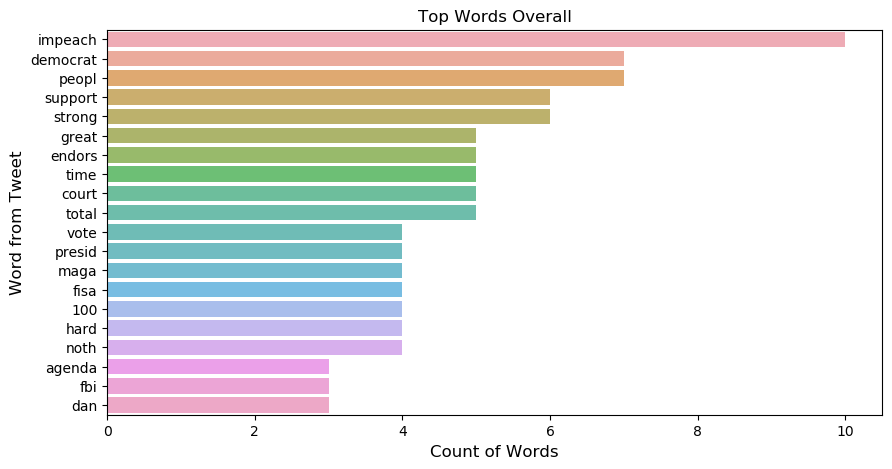

In [16]:
#This is a simple plot that shows the top 20 words being used
#df.plot(20)

df = df[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()


In [17]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [18]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

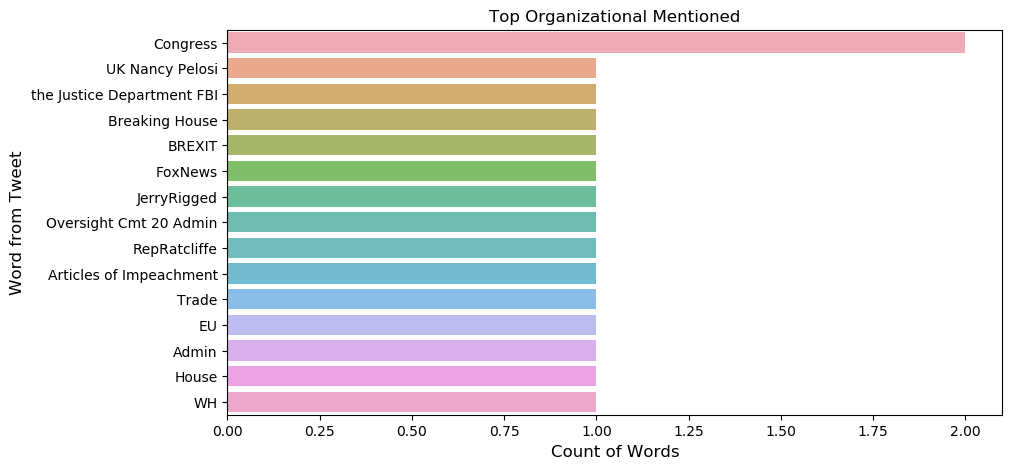

In [35]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizational Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [19]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()

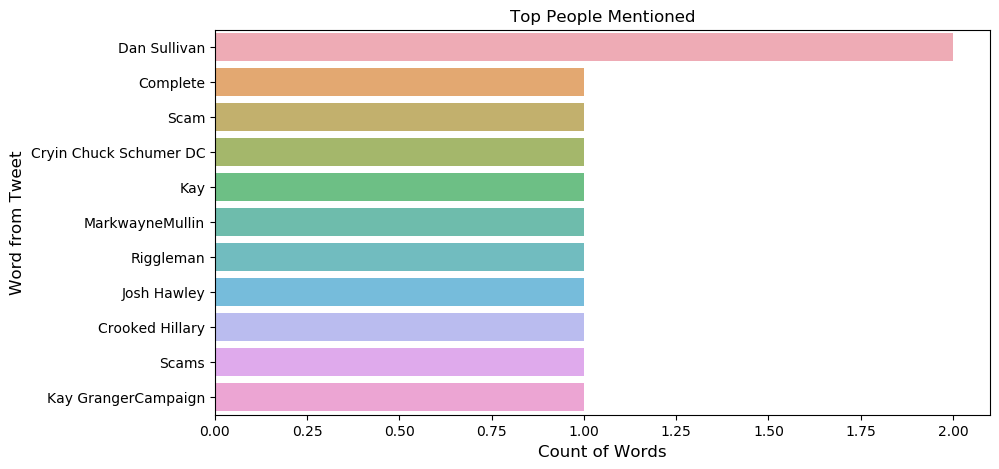

In [20]:
df = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()